# Pasos previos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importación de los datos

In [2]:
df = pd.read_csv("archives/heart.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## Muestra de datos

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trtbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalachh'}>],
       [<Axes: title={'center': 'exng'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slp'}>, <Axes: title={'center': 'caa'}>],
       [<Axes: title={'center': 'thall'}>,
        <Axes: title={'center': 'output'}>, <Axes: >, <Axes: >]],
      dtype=object)

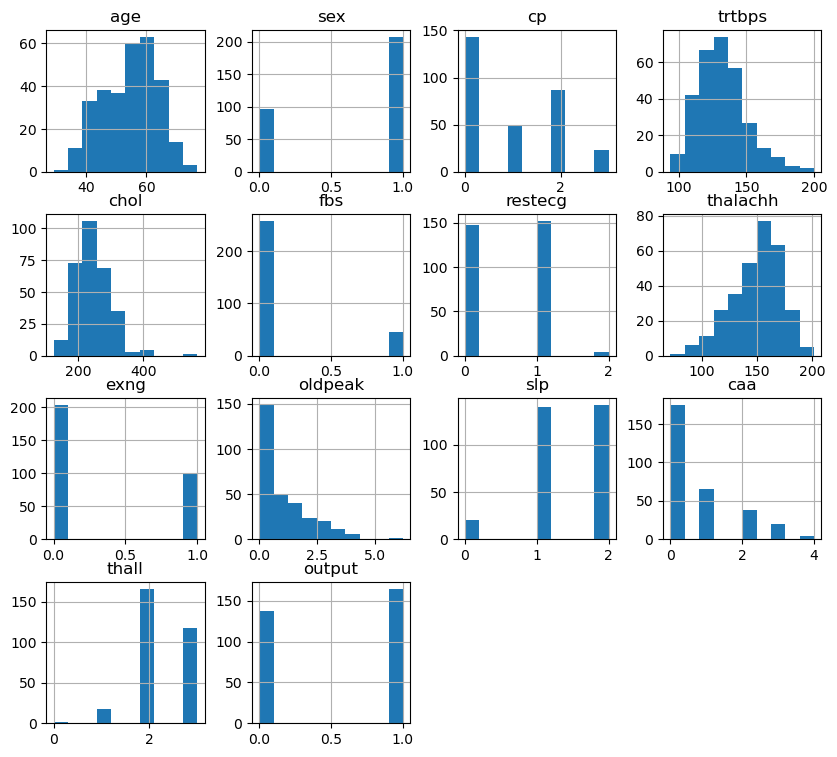

In [3]:
df.hist(figsize=(10,9))

<Axes: >

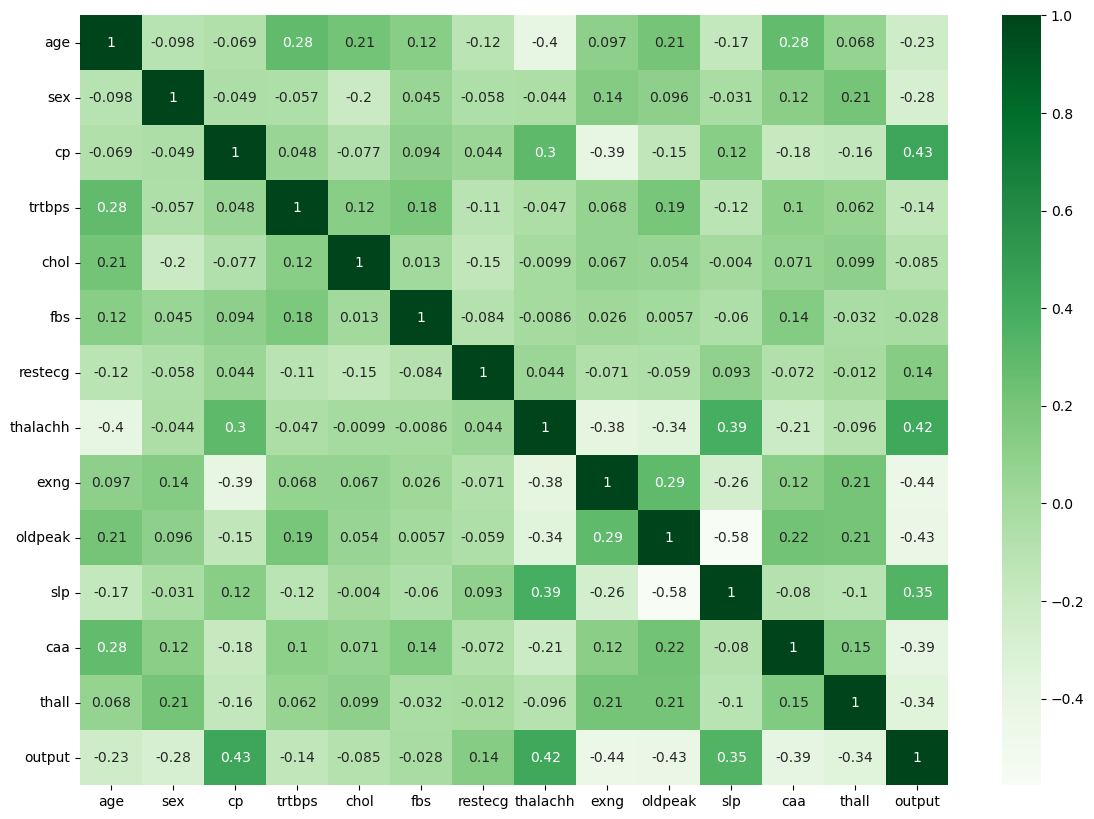

In [4]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), annot=True, cmap="Greens")

<Axes: >

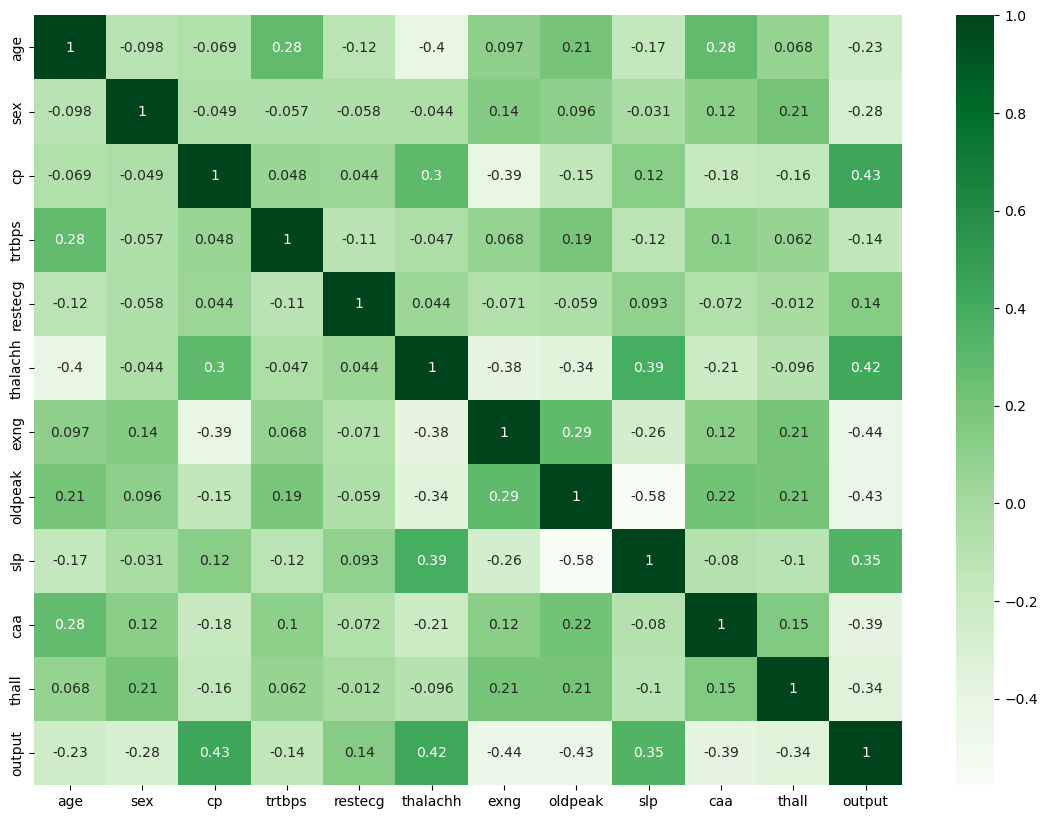

In [5]:
df.drop(["chol", "fbs"], axis=1, inplace=True)

plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), annot=True, cmap="Greens")

# Modelo

## Separación de datos

In [6]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.preprocessing import StandardScaler

In [7]:
X_train_full, X_test, y_train_full, y_test = train_test_split(df.drop("output", axis=1), df["output"], 
                                                              random_state=42) 

X_train, x_val, y_train, y_val = train_test_split(X_train_full, y_train_full,
                                                  random_state=42)

ss = StandardScaler()
X_train = ss.fit_transform(X_train.astype("float64"))
x_test = ss.transform(X_test.astype("float64"))
x_val = ss.transform(x_val.astype("float64"))

In [8]:
modelo = Sequential()
modelo.add(Dense(32, input_dim=X_train.shape[1], activation="relu"))
modelo.add(Dense(16, activation="relu"))
modelo.add(Dense(8, activation="relu"))
modelo.add(Dense(1, activation="sigmoid"))
sgd=SGD(learning_rate=0.002)
modelo.compile(loss="binary_crossentropy", optimizer=sgd,
               metrics=["accuracy","recall"])
modelo.summary()

c:\Users\nicol\miniconda3\envs\ia\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,057 (4.13 KB)

 Trainable params: 1,057 (4.13 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

In [10]:
epochs = 10000
batch_size = 20
historia = modelo.fit(X_train, y_train, 
                      epochs=epochs, batch_size=batch_size,
                      validation_data=(x_val,y_val),
                      callbacks=[early_stopping_cb]
)

Epoch 1/10000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.4353 - loss: 0.7633 - recall: 0.0000e+00 - val_accuracy: 0.4386 - val_loss: 0.7686 - val_recall: 0.0000e+00
Epoch 2/10000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4887 - loss: 0.7444 - recall: 0.0000e+00 - val_accuracy: 0.4211 - val_loss: 0.7662 - val_recall: 0.0000e+00
Epoch 3/10000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4763 - loss: 0.7336 - recall: 0.0000e+00 - val_accuracy: 0.4211 - val_loss: 0.7639 - val_recall: 0.0000e+00
Epoch 4/10000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4469 - loss: 0.7520 - recall: 0.0000e+00 - val_accuracy: 0.4211 - val_loss: 0.7616 - val_recall: 0.0000e+00
Epoch 5/10000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4082 - loss: 0.7572 - recall: 0.0000e+00 - val_accuracy: 0.4211 - val_loss: 0.7597 - val_recall: 0.0000e+00
Epoch 6/10000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4295 - loss: 0.7516 - recall: 0.0000e+00 - val_accuracy: 0.4211 - val

In [11]:
mse_test = modelo.evaluate(X_test, y_test)
mse_test

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4685 - loss: 17.0916 - recall: 0.0000e+00 


[16.816360473632812, 0.46052631735801697, 0.0]

In [12]:
y_pred = modelo(X_test[0:10])
y_pred

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[6.6088652e-23],
       [4.1925221e-25],
       [2.0729551e-19],
       [1.4254581e-20],
       [1.1560135e-15],
       [9.9991464e-19],
       [1.6573122e-19],
       [3.4256286e-30],
       [1.1191887e-19],
       [7.0978005e-16]], dtype=float32)>

In [13]:
y_test[0:10]

179    0
228    0
111    1
246    0
60     1
9      1
119    1
223    0
268    0
33     1
Name: output, dtype: int64

<Axes: >

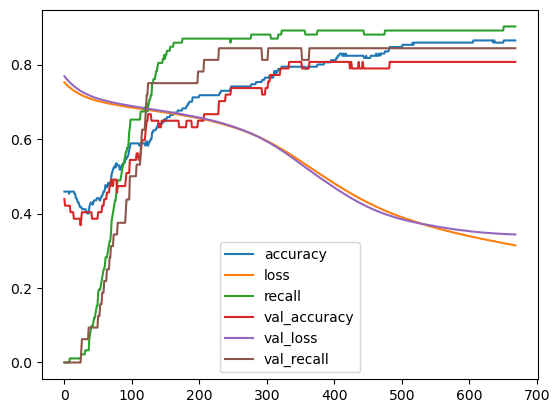

In [14]:
pd.DataFrame(historia.history).plot()